<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%88%9C%EC%B0%A8%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시나리오
- AI를 이용해서 많은 부분이 개선되었고, 이벤트도 성공적으로 결론이 나왔다.
- 그런데, 요즘 상품에 대한 댓글이 이슈가 있어서 댓글을 보고 좋은 상품인지 개선해야될 상품인지 분석하고 싶어한다(별점이슈)
- 댓글을 분석하는 기법을 연구

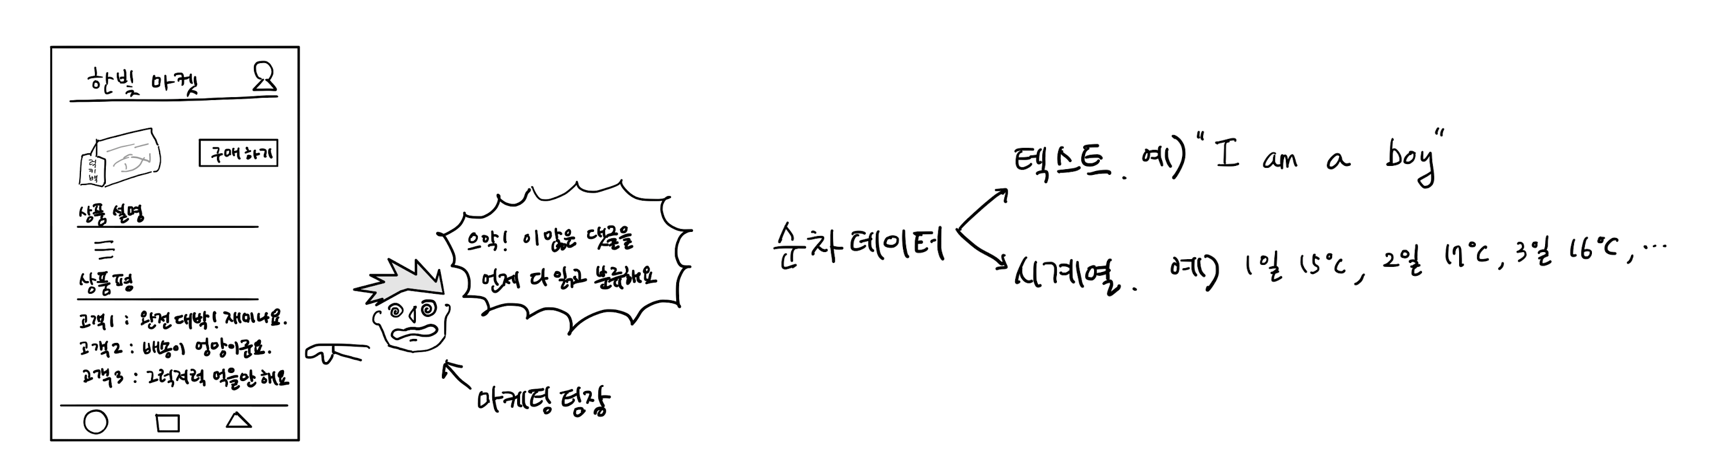

# 순차데이터(Sequential Data)
- 순서에 의미가 있는 데이터를 의미
- 종류
    - 텍스트
    - 시계열 데이터(time series data)
- 훈련종류 : 댓글
    - 텍스트 데이터
    - 이런 데이터는 순서를 유지하며 신경망에 주입해야함(단어의 순서가 섞이면 안됨)
        - 사진데이터 : 순서 상광없이 랜덤훈련결과가 더 결과가 좋았음
- 순차데이터를 다룰떄는 이전에 입력한 데이터를 기억하는 기능이 필요

ex)

"별로지만 추천해요"
1. "추천해요" : 긍정
2. "별로지만" : 부정
- "추천해요" 입력시, "별로지만"을 기억해야 파악가능
- 완전한 긍정x

# 피드포워드(순방향) 신경망(FNN : feed-forward neural networks)
- 입력 데이터의 흐름이 앞으로만 전달되는 신경망
- 하나의 샘플(또는 하나의 배치)를 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 생픔을 처리할 때 재사용하지 않음
- 이전 샘플데이터를 기억하는 메모리가 없음
    - 완전연결신경망, 합성곱신경망

# 순환신경망(RNN : Recurrent Neural Networks)
- 구조
    - 완전연결신경망 + 이전데이터 처리 순환고치(은닉층에 위치)
- 주의점
    - 재사용하기 위해서 이전데이터가 순환될 필요가 있음(앞으로 전달되어서는 안됨)

<img src="https://blog.kakaocdn.net/dn/x4jYK/btreAIymQnS/m4D2j31qV9wpkGuVJj3rLk/img.png" width=500px>

## 타임스탭(timestep)
- 순환고리를 이용하여 샘플을 처리하는 한단계
- 뉴런의 출력이 다시 자기자신으로 전달
    - 샘플처리할 때, 바로 이전에 사용했던 데이터를 재사용(누적연산)

ex)

1. A,B,C 3개의 샘플을 처리하는 순환 신경망 뉴런
2. 0에서 출력된 결과로 첫번째 샘플을 처리하고 난 출력 0_A가 다시 뉴런으로 들어감



---
- 아래 그림처럼 A,B,C 3개의 샘플을 처리하는 순환 신경망 뉴런이 있음
- 0는 출력된 결과로 첫번째 샘플을 처리하고 난 출력 0_A가 다시 뉴런으로 들어감
    
    =>A에 대한 정보가 들어 있음
- B를 처리할 때 앞에 A를 사용해 만든 출력 0_A를 함께 사용함
- 마지막까지 돌리면 0_C는 A,B,C의 정보가 담겨 있음

- 물론 0_C는 A에 대한 정보보다는 B에 대한 정보가 더 많이 들어 있다.

- 그래서 순환 신경망에서는 이전 샘플에 대한 기억을 가직 있다 를 의미
- 이렇게 샘플을 처리하는 한 단계를 타임스탭(timestep)이라고 함

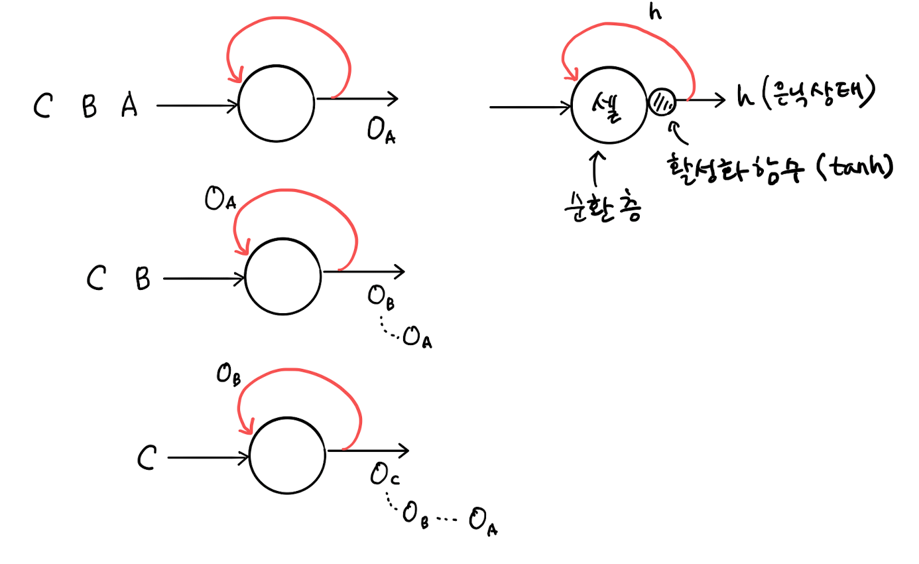

## 셀(cell)
- 순환 신경망에있는 층
- 한 셀에는 여러개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현
- 셀의 출력을 **은닉상태(hidden state)**라고 함

- 합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있음
    - 하지만, 기본구조는 같다.
    - 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보낸다.
    - 달라지는 것 : 층의 출력(즉 은닉상태)을 다음 타임스텝을 재사용

- 활성화 함수 : 하이퍼볼릭 탄젠트(hyperbolic tangent, tanh : 텐h)
    - 은닉층의 활성화함수로 자주 이용
    - tanh 함수도 s자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 함
        - 차이점 : -1 ~ 1 사이의 범위를 가짐

<img src = "https://velog.velcdn.com/images/sobit/post/d4a237fe-212d-4f7e-ac6d-a5559ddadbd7/image.png" width=700px>

- 활성화 함수 표시여부
    - 다른 신경망 : 필수x(그림단순화)
    - 순환 신경망 : 필수o

- 가중치의 종류
    1. W_x : 입력에 곱해지는 가중치
    2. W_h : 이전 타입스텝의 은닉상태에 곱해지는 가중치
    
- 가중치 이용
    - 공통 : 뉴런마다 하나의 절편이 포함
    - 다른 신경망 : W_x만
    - 순환 신경망 : W_x * W_h
        - 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타입스텝의 은닉상태를 만듬

<img src="https://velog.velcdn.com/images%2Fcha-suyeon%2Fpost%2Fbd569904-5a4e-4b7f-b9bd-8fbf9897edf0%2Fimage.png">

- 셀의 출력(은닉상태)이 다음 타임스텝에 재사용되기 때문에 타임스텝으로 셀을 나누어 그릴수 있음

- 위 오른쪽 그림을 셀을 타임스텝으로 펼치는 과정
    - 타임스텝 1에서 셀의 출력 h_1이 타임스텝 2의 셀로 주이보디고 W_h와 곱해진다.
    - 타임스텝 2에서 셀의 출력 h_2이 타임스텝 2의 셀로 주이보디고 W_h와 곱해진다.
    
    => 타임스텝의 가중치는 W_h 하나

- W_h : 타임스텝에 따라 변화되는 뉴런의 출력을 학습 -> 순차데이터를 다루는데 필요

- 그럼 맨 처음 타임스텝 1에서 사용되는 이전 은닉상태 h_0은 없기때문에 0으로 초기화하여 구한다.

## 셀의 가중치와 입출력
- 셀에서 필요한 가중치의 크기계산, 복잡한 모델일수록 가중치 개수계산이 필요

ex)
1. 순환층에 입력되는 특성의 개수 : 4개
2. 순환층의 뉴런 : 3개
- W_x 의 크기 : 입력에 곱해지는 가중치
    - 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에(완전 연결 신경망의 입력층과 은닉층의 연결과 같음)
    - 계산 : 4 * 3 = 12
- W_h의 크기 : 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치
    - 하나의 뉴런의 은닉상태가 다음 타임스텝에 재사용될때 모든 뉴런에 전달
        - 순환(빨간색) and 전달(파란색) and 받음(검은색)
        - 즉, 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결됨
    - 계산 : 3 * 3 = 9

- 모델 파라미터 계산
    - 가중치에 절편을 더함 (W_x + W_h + 절편)
    - 각 뉴런마다 하나의 절편이 있음
    - 계산 : 12 + 9 + 3 = 24

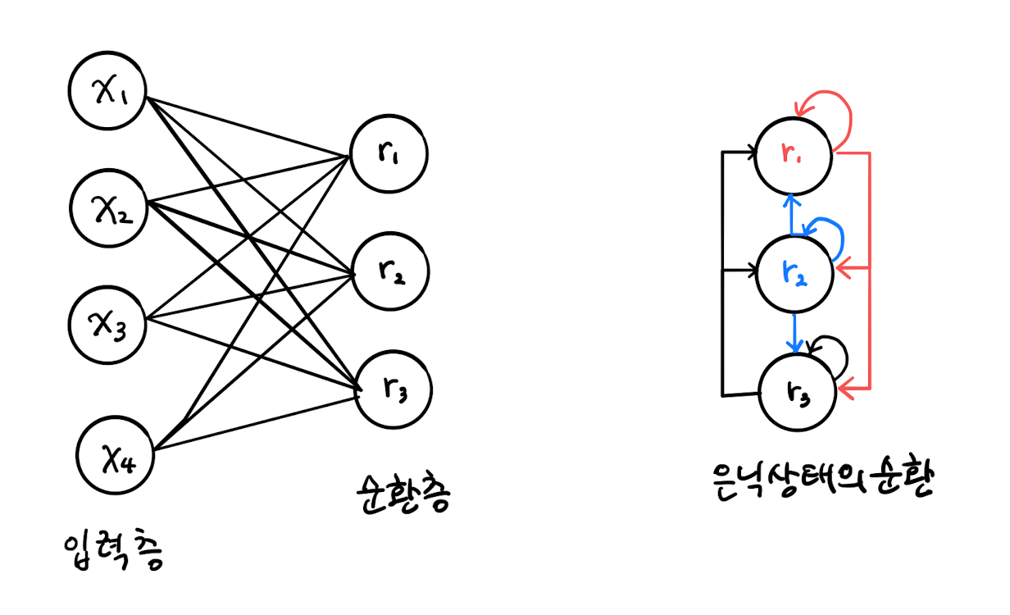

## 순환층의 입출력
- 합성곱층
    - 입력 : 하나의 샘플이 3개의 차원(너비, 높이, 채널)
    - 입력이 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널(깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지

- 순환층
    - 입력 : 샘플(스퀸스)은 시퀀스 길이(=단어 개수)와 단어 표현 2차원배열
    -  타임스텝 길이
        - 스퀸스 안에 들어있는 아이템의 양 = 시퀸스의 길이
    - 결과 : 1차원배열 (순환층의 뉴런의 갯수로 결정)

ex)

샘플 : I am a boy

분석 : 4개의 단어로 구성

방법 : 각각의 단어를 3개의 어떤 숫자로 표현한다면? = 배열로 표현한다면?

결과 : 깊이차원제거 -> 순환층의 뉴런개수만큼 출력

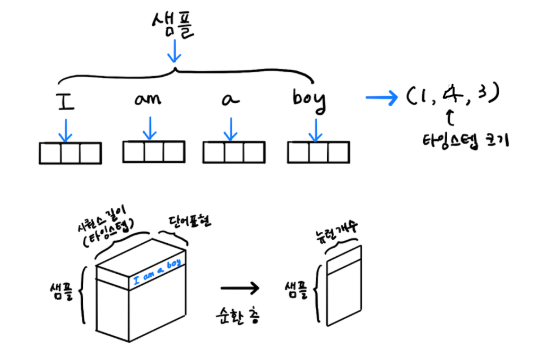

- 앞에서 셀의 출력을 설명할 때 참고해야 할 상태가 있다. -> 앞에서는 셀이 모든 타임스텝에서 출력을 만든 것 처럼 표현했다.
- 하지만 사실 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

- 아래 그림에서 이런 특징을 그림으로 표현하기 위해 셀의 출력을 점선으로 표현함
- 또 마지막 타임스텝의 은닉 상태임을 나타내기 위해 아랫첨자 f를 사용함

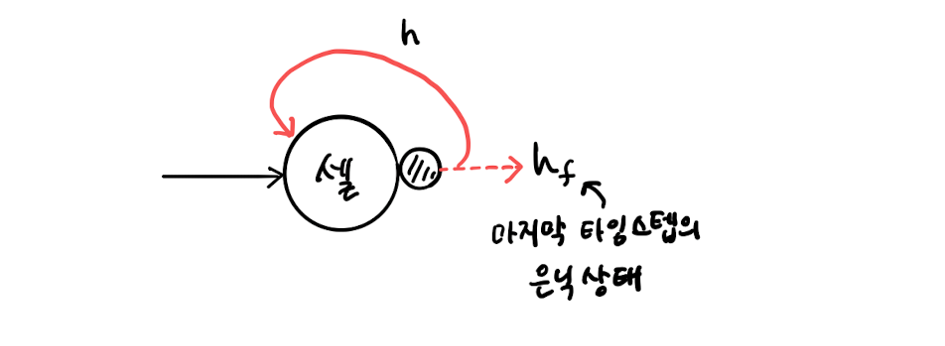

이는 마치 입력된 스퀸스 길이를 모두 읽어서 정보를 마지막 은닉상태에 압축하여 전달하는 것처럼 보인다.

- 순환 신경망이 정보를 기억하는 메모리를 가진다고 표현하는 것
    - 순환 신경망이 순차 데이터의 최적화됨
- 순환 신경망도 완전 연결 신경망이나 합성곱 신경망처엄 여러개의 층을 쌓을 수 있다.
- 순환층을 여러개 쌓았을 때는 셀의 출력은 어떻게 달라질지 알아야함
- 셀의 입력은 샘플마다 타임스텝과 단어 표현을 이루어진 2차원 배열이어야함

- 따라서 첫번째 셀이 마지막 타임스텝의 은닉상태만 출력해서는 암됨
    - 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉상태를 출력

- 아래 그림은 2개의 순환층을 쌓은 경우
    - 첫번째 셀 : 모든 타임스텝의 은닉상태 출력
    - 두번째 셀 : 마지막 타임스텝의 은닉상태만 출력

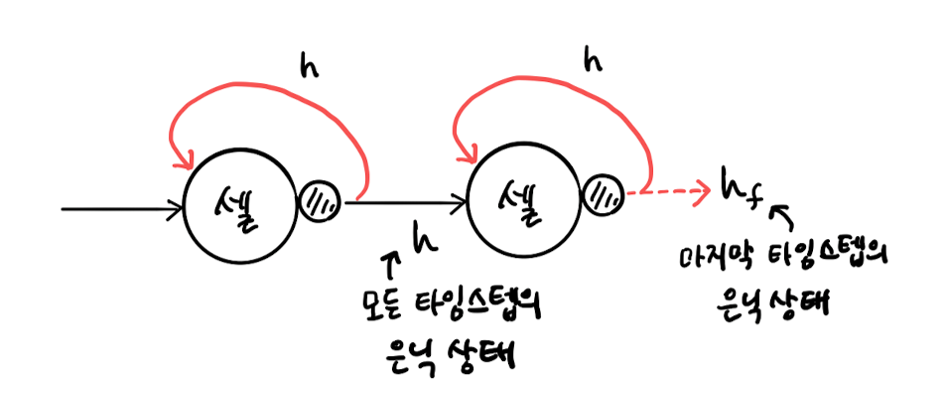

- 마지막 출력층의 구성 : 마지막에 밀집층을 두어 클래스를 분류
    - 다중분류 : 출력층 클래스 개수만큼 뉴런, 소프트맥스함수이용
    - 이준분류 : 하나의 뉴런, 시그모이드함수
    
- 차이점
    - 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요가 없음
    - 셀의 출력을 그대로 밀집층에 사용할 수 있음

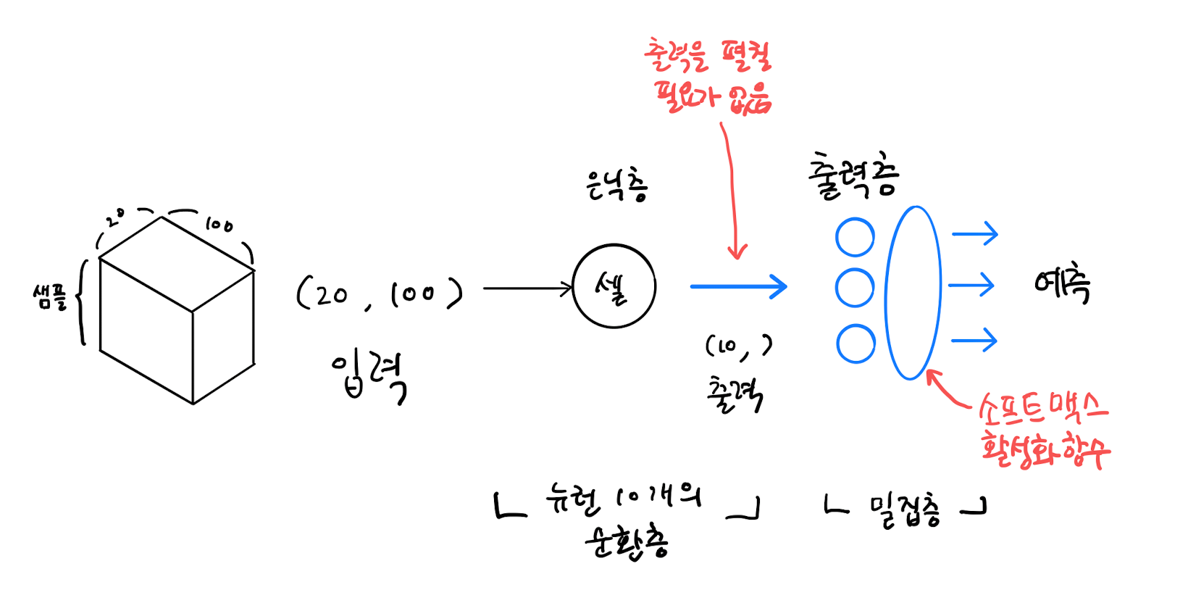


ex)

다중분류 문제에서 입력 샘플의 크기 : (20,100)일 경우

하나의 순환층을 사용하는 순환 신경망 구조는 아래 참고


---

- 샘플은 20개의 타임스텝으로 이루어져 있음
- 또 각 타임스텝은 100개의 표현또는 특성으로 이루어져 있음
- 이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉상태만 출력됨
- 이 은닉 상태의 크기가 셀에 있는 뉴런의 개수가 되므로 (10, )이 된다.

- 샘플마다 셈이 1차원 배열을 출력하기 때문에 합성곱 신경망처엄 Flatten 클래스로 펼칠 필요없이 바로 출력층에 연결함
- 위 그림은 3개의 클래스를 가진 다중분류일 경우, 출력층에 3개의 뉴런과 소프트맥스 활성화함수를 이용


# 순환신경망 실습
- 더미데이터 : IMDB 리뷰 데이터 셋
    - 유명한 인터넷 영화 데이터베이스인 imdb.com 에서 수집한 리뷰를 감상평에 따라 긍정과 부정을 분류해 높은 데이터 셋
    - 총 50,000개의 샘플(긍정 : 부정  = 5:5 비율)
- 데이터 전처리
    - 훈련데이터 : 테스트데이터  = 5:5 비율

# 자연어 처리(natural language processing : nlp)
- 컴퓨터를 사용해 인간의 언어를 처리하는 뷴야(음성인식, 기계번역, 감정분석)

# 말뭉치(corpus : 코퍼스)
- 자연어 처리분야에서 훈련데이터를 말함(IMDB 리뷰 데이터셋이 이에 해당)

# 학습
- 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터
    - 이미지
        - 특별한 변환을 하지 않았음(RGB) => 이미지가 정수 픽셀 값으로 이루어져 있기때문
    - 텍스트
        - 텍스트 자체를 신경망에 전달하지 않음
        - 데이터에 등장하는 단어마다 고유한 정수를 부여 = 지표를 찍는 것뿐(연산에 영향x)

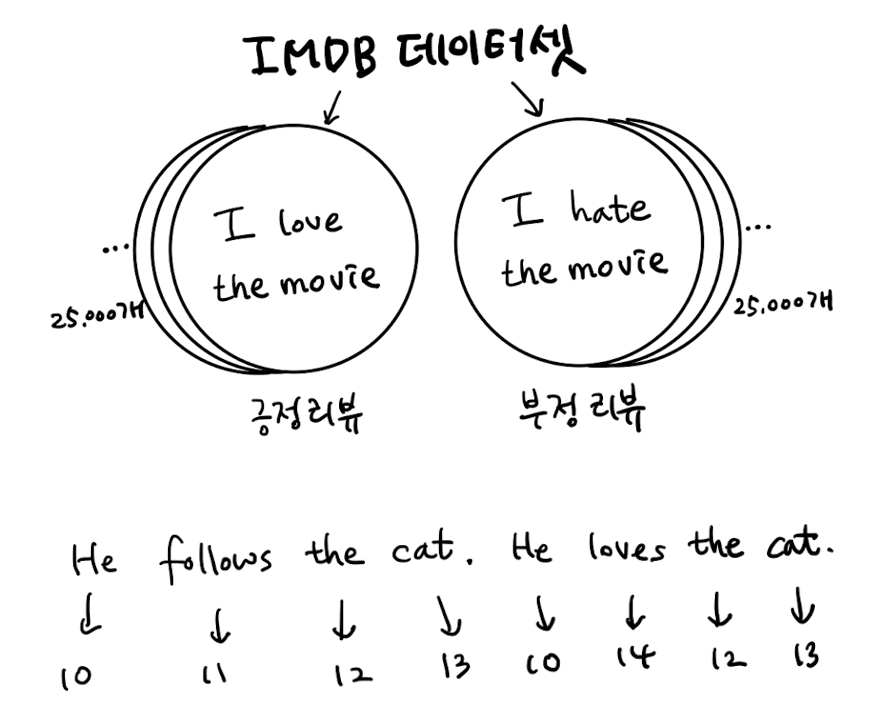

## 토큰(token)
- 단어를 숫자매핑하기 전에 분리한 작은 단위
- 하나의 샘플은 여러개의 토큰으로 구성
- 1개의 토큰이 하나의 타임스텝에 해당
- 방법
    - 영어 : 모두 소문자로 바꾸고, 구둣점(.,)을 삭제한 다음 공백을 기준으로 분리
        - 간단한 문제라면 영어 말뭉치에서 토큰을 단어와 같게봐도 됨.
    - 한글 : 조사가 발달되어 있기에 공백보다는 [형태소](https://velog.io/@hunterhunter/%ED%95%9C%EA%B5%AD%EC%96%B4-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D-%EA%B8%B0%EC%B4%88) 분석
- 특정한 용도의 예약정수 존재
    - 0 : 패딩
    - 1 : 문장의 시작
    - 2 : 어휘사전에 없는 토큰
        - 어휘사전 : 훈련세트에 고유한 단어를 뽑아 만든 목록
        - 어휘사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입

## 숫자매핑
- 각각의 단어를 하나의 정수 or 동일한 단어는 동일한 정수
    - 단어의 매핑되는 정수는 단어의 의미나 크기와 연관x

## 데이터
- 데이터셋 : 50,000개
    - 긍정 : 부정 = 5 : 5
    - 1차원 배열
- IMDB 리뷰 텍스트는 길이가 제각각을 되어 있음
    - 그래서 고정크기의 2차원 배열에 담기보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

#실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있음
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) =\
    imdb.load_data(num_words=200)

# num_words : 전체 데이터셋에서 가장 자주 등장하는 단어갯수 지정

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(25000,) (25000,)


개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 numpy 배열 : 정수, 실수외에도 파이썬 객체도 담음

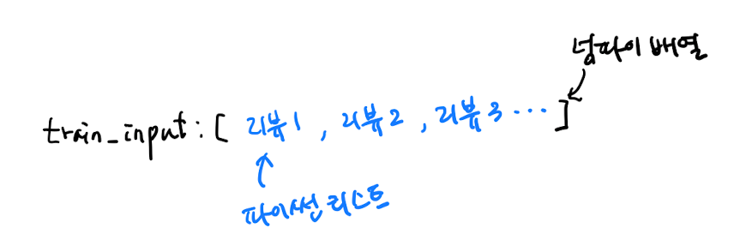

In [3]:
# 리스트 확인_2차원
print(train_input[0])
# 0 : 패딩
# 1 : 문장의 시작
# 2 : 어휘사전에 없는 토큰

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
# 길이확인 : 단어만
print("리뷰1 길이 : ", len(train_input[0]))
print("리뷰2 길이 : ", len(train_input[1]))
# 리뷰마다 각각 길이가 다름

리뷰1 길이 :  218
리뷰2 길이 :  189


In [7]:
# 텐스플로에 있는 IMDB 리뷰데이터는 이미 정수로 변환되어 있음
# 전에 num_words=200 으로 지정했음으로 어휘사전에 200개 단어만 들어가 있음
# 규제는 꼭!!! : 너무 많으면 잘 안쓰는 단어도 있기에 오래걸림
# 어휘사전에 없는 단어는 2로 표시
# 200개의 단어 기준은 imdb.load_date() 한수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 200개의 단어를 선택함

print(train_target[:20]) # 타깃 데이터를 출력
# 긍정(1)인지 부정(0)인지 파악하는 target

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [9]:
# 해결할 문제
# 리뷰가 긍정인지 부정인지 판단하는 것 : 이진분류

from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [10]:
print("train : ", train_input.shape) # 20,000
print("val   : ", val_input.shape)   # 5,000
print("test  : ", test_input.shape)  # 25,000

train :  (20000,)
val   :  (5000,)
test  :  (25000,)


### 데이터분석
- 훈련세트에 대해서 각 리뷰의 길이를 계산해 numpy 배열에 담는다.
- 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인할 것

In [14]:
import numpy as np

# lengths 배열 : 리뷰의 길이
lengths = np.array([len(x) for x in train_input])

print("평균 :", np.mean(lengths), " 최대 :", np.max(lengths), " 최소 :", np.min(lengths)," 중간 :", np.median(lengths))
# 평균 : 239.00925  최대 : 1854  최소 : 11  중간 : 178.0

평균 : 239.00925  최대 : 1854  최소 : 11  중간 : 178.0


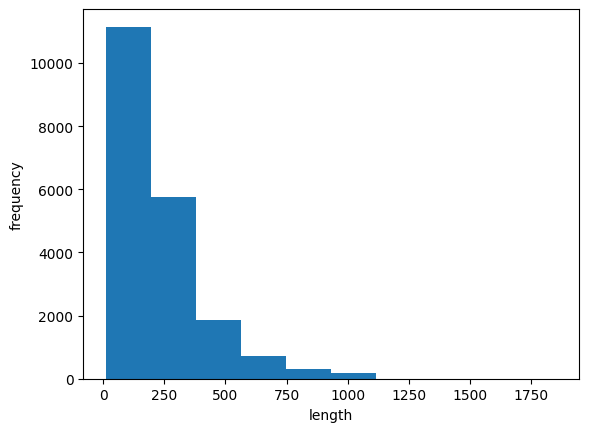

In [15]:
# lengths 배열의 히스토그램(막대그래프) 출력
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

# 왼쪽으로 치우침 : 글자수 적은 것_왼쪽, 많은 것_오른쪽
# 대부분 리뷰길이 300미만 : 평균(239)이 중간값(178)보다 높은 이유
# 1000개 단어 이상의 리뷰도 존재

### 분석결과
- 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용하려 한다.
- 이유?
    - 비용적인 측면(속도, 시간낭비)
- 개선
    - 하지만 여전히 100개의 단어보다 작은 리뷰가 있음
    - 이런 리뷰들의 길이를 100에 맞추려면 패딩이 필요
    - 보통 패딩을 나타내는 토큰으로 0을 사용
- 방법
    - 수동으로 훈련세트에 있는 2만개의 리뷰를 순회하면서 길이가 100이 되도록 자르거나 0으로 패당할 수 있음
    - 하지만 번거로운 작업이기에 도구이용 : keras의 시퀸스 데이터 길이를 맞춰주는 **pad_sequences()함수** 이용

## 데이터 전처리

### 시퀸스길이조정([pad_sequences()](https://yeko90.tistory.com/entry/keras-how-to-padding-with-padsequences))
- 시튄스의 길이를 조정하는 함수
- maxlen 보다 긴 시퀸스 길이를 가진 것을 조정하는 함수
    - truncating : 자르는 위치 결정
        - 앞 : pre
        - 뒤 : post
    - 길이를 늘릴시, 패딩을 이용
        - 토큰값 0

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# train_input의 길이 100으로 맞춤
# truncating : 정보손실위치선정 (default : pre_앞)
train_seq = pad_sequences(train_input, maxlen = 100, truncating = 'pre')

lenghtspd = np.array([len(x) for x in train_seq])

print("평균 :", np.mean(lenghtspd), " 최대 :", np.max(lenghtspd), " 최소 :", np.min(lenghtspd)," 중간 :", np.median(lenghtspd))
# 평균 : 100.0  최대 : 100  최소 : 100  중간 : 100.0

평균 : 100.0  최대 : 100  최소 : 100  중간 : 100.0


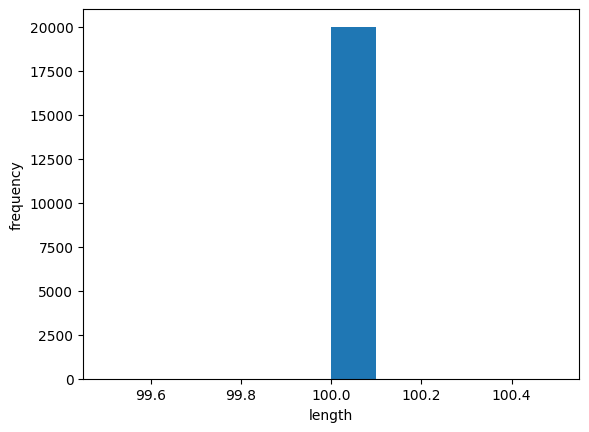

In [17]:
import matplotlib.pyplot as plt

plt.hist(lenghtspd)
plt.xlabel('length')    #길이
plt.ylabel('frequency') #빈도
plt.show()

In [18]:
print(train_seq.shape)
# train_input : 파이썬 리스트 배열이었지만, 길이를 100으로 맞춤
# train_seq : (20,000, 100)으로 2차원배열

(20000, 100)


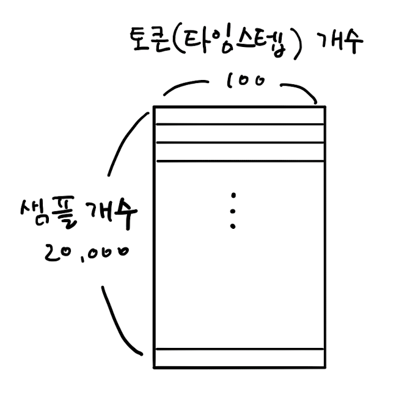

In [19]:
print(train_seq[0]) # 100개로 자른 0번에 있는 값
# 18 * 5 + 10 = 90 + 10 = 100 (앞뒤에 패딩이 없는 것을 봐서는 어디가 잘린 것?)

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


길이조정 전

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 2, 8, 79, 17, 2, 8, 112, 6, 2, 20, 17, 2, 2, 4, 2, 20, 9, 2, 6, 2, 7, 2, 2, 6, 185, 2, 24, 55, 2, 5, 23, 2, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 2, 17, 73, 17, 2, 36, 26, 2, 43, 2, 83, 4, 2, 2, 74, 83, 4, 2, 2, 82, 4, 96, 4, 2, 2, 8, 32, 4, 2, 9, 184, 2, 13, 2, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10,

***10***, 4, 20, 9, 2, 2, 2, 5, 45, 6, 2, 2, 33, 2, 8, 2, 142, 2, 5, 2, 17, 73, 17, 2, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 2, 69, 2, 142, 73, 2, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 2, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 2, 158]

길이조정 후

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]

In [20]:
print(train_input[0][-10:]) # train_input에 있는 원본 샘플의 끝쪽을 확인
# 은슴 인덱스와 슬라이싱을 사용해서 마지막 10개를 확인

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [22]:
print(train_seq[5]) # 6번째 토큰을 확인하면 앞쪽에 0으로 채워짐

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [23]:
# 검증세트로 길이 100로 맞춤
val_seq = pad_sequences(val_input, maxlen=100)
print(val_seq.shape)

(5000, 100)


## 순환신경망 생성_1
- 여러종류의 순환층 클래스를 제공하지만 가장 간단한 SimpleRNN 클래스 사용
- IMDB리뷰 분류 : 이진분류
- 출력층 : 1개의 뉴런, 시그모이드 활성함수(=이진분류)

In [24]:
from tensorflow import keras

# Sequential() 클래스는 순환신경망, 합성곱신경망, 일반적인 인공신경망 모두 만들 수 있음
# 다만 층을 쌓기 때문에 Sequential 클래스로 이름을 붙임(순차데이터와 관련없음)
model = keras.Sequential()

#                            뉴런개수     스퀸스길이, 키워드갯수      활성화함수
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 200), activation='tanh'))
# SimpleRNN(뉴런의 개수, 입력차원(샘플의 길이(토큰), imdb.load_data(num_words=200), 활성화함수)
# input_shape의 두번째 차원인 200에 대한 설명
# activation='tanh' : 기본 하이퍼볼릭 탄젠트함수 이용 (생략가능)

model.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

### 원-핫인코딩([One-Hot Encoding](https://wikidocs.net/22647))
- 정수값을 배열에서 해당정수 위치의 원소만 1이고 나머지는 0으로 변환
    - 다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해서 사용함
- 문제
    - train_seq, val_seq
    - 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 활서오하 출력을 만들기 때문
    - 분명히 이 정수 사이에 어떤 관련이 없음.
- 해결
    - 따라서, 단순한 정수값을 신경망에 입력하기 위해서는 다른 방식을 찾아야함
    - 정수값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법 -> 원-핫인코딩
<br/><br/>

ex) 원-핫 인코딩예시그림

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2Vq-oTRjOOVs7NzkIAgYf5kl93ySVg3kM_A&s" width=500px>

#### .to_categorical()
- imdb.load_data(num_words=200)에서 200개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 200개임
    - 즉, 훈련 데이터에 포함될 수 있는 정수값의 점위는 0(패딩토큰) ~ 199까지가 됨 => 따라서, 배열의 길이 : 200
    
- I am a boy에 있는 각 단어를 숫자 3개로 사용해 표현한다고 가정
    - 토큰마다 200개의 숫자를 사용해 표현하는 것
    - 다만 200개중 하나만 1이고 나머지는 모두 0으로 만들어 정수 사이에 있던 크기 속성을 없앰
    - keras.utils.to_categoricla 유틸리티가 정수 배열을 입력하면 원-핫 인코딩된 배열을 반환

In [26]:
# 훈련데이터 변환
train_oh = keras.utils.to_categorical(train_seq) # 원-핫인코딩 변환
print(train_oh.shape)
# 배열의 크기
# 샘플       : 20000
# 뉴런개수   :  100
# 키워드개수 :  200

(20000, 100, 200)


In [27]:
# train_oh의 토큰 : 10
print(train_oh[0][0][:15])
# [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] : index 10에 1인 것을 확인

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [29]:
# train_oh의 토큰 : 4
print(train_oh[0][1][:15])
# [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] : index 4에 1인 것을 확인

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
print(np.sum(train_oh[0][0]))
# 배열의 모든 합 : 1

1.0


In [30]:
# 검증데이터 변환
val_oh = keras.utils.to_categorical(val_seq)
print(val_oh.shape)
# 배열의 크기
# 샘플       : 5000
# 뉴런개수   :  100
# 키워드개수 :  200

(5000, 100, 200)


### 모델 요약(model)
- SimpleRNN에 전달할 샘플의 크기 : (100, 200)
     - 이 순환층은 마지막 타임스텝의 은닉상태만 출력함
    - 이때문에 출력 크기가 순환층의 뉴런개수와 동일한 8
- 순환층에서 사용된 모델의 파라미터 계산
    - 입력토큰 : 200 차원의 원-핫 인코딩 배열 : 순환층의 뉴런 8개와 완전히 연결
        - 200 * 8 = 1600개의 가중치
    - 순환층의 은닉상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해짐
        - 이 은닉상태도 순환층의 뉴런과 오나전히 연결되기 때문에
        - 8(은닉상태크기) * 8(뉴런갯수) = 64개의 가중치
    - 뉴런마다 절편존재
        - 1600 + 64 + 8 = 1672


- 출력층 : 8 * 1 + 1 = 9

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

## 순환신경망 훈련(model)

In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4) #학습률 0.0001 지수표현

model.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True) # 최상을 점수로 저장

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True) #조기종료 3번 인내심

#에포크 100, 배치크기 64
history = model.fit(train_oh, train_target, epochs = 100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 체크포인트 조기종료

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.4945 - loss: 0.7135 - val_accuracy: 0.4924 - val_loss: 0.7053
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5020 - loss: 0.7038 - val_accuracy: 0.4960 - val_loss: 0.7010
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5059 - loss: 0.6993 - val_accuracy: 0.4962 - val_loss: 0.6984
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5124 - loss: 0.6964 - val_accuracy: 0.5038 - val_loss: 0.6962
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5154 - loss: 0.6943 - val_accuracy: 0.5110 - val_loss: 0.6939
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5195 - loss: 0.6925 - val_accuracy: 0.5120 - val_loss: 0.6925
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5228 - loss: 0.6915 - val_accuracy: 0.5162 - val_loss: 0.6917
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5255 - loss: 0.690

### 훈련평가

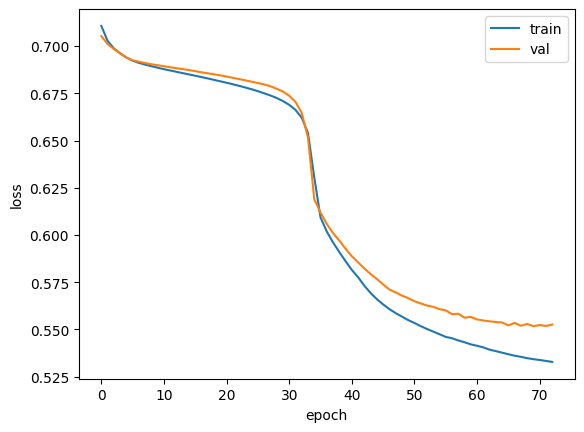

In [36]:
# 에포크 73 : accuracy: 73.56%
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#### .nbytes
- 해당 변수가 메모리상에서 차지하고 있는 부분을 알려주는 것

In [38]:
# 원-핫인코딩의 단점 : 입력데이터가 엄청 커짐
print(train_seq.nbytes, train_oh.nbytes)
#         8000000          3200000000
# 토큰 1개를 200차원으로 늘렸기 때문에 : 권장x

8000000 3200000000


## 순환신경망 생성_2

### 단어 인베딩([word embedding](https://casa-de-feel.tistory.com/28))
- 순환 신경망에서 텍스트를 처리할떄 즐겨사용하는 방법
    - 원-핫인코딩의 단점해결
- 각 단어를 고정된 크기의 실수 -> 백터로 바꿔줌

- 원-핫인코딩보다 훨씬 의미있는 값을 채워져 있기 때문에 자연어 처리에도 좋은 성능을 발휘
- 물론 이런 단어 임베딩 백터를 만드는 층은 이미 준비되어 있다.
- keras.layers.Embedding 클래스가 임베딩 기능을 제공
    - 이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은 단어 임베딩 학습을 함

- 장점
    - 입력으로 정수 데이터를 받는 것
    - 원-핫인코딩을 변경된 train_oh(원-핫인코딩) 배열이 아니라 trian_seq를 사용할 수 있음(메모리 관리유용)
    - 훨씬 작은 크기로도 단어를 잘 표현할 수 있음

ex)

샘플 하나를 200차원으로 늘렸기 때문에 (100,) 크기의 샘플(100,200)으로 커졌음

이와 비슷하게 임베딩도 (100,)크기의 샘플 (100,200)과 같이 2차원 배열로 늘림

하지만, 원-핫인코딩과 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있음

<img src="https://blog.kakaocdn.net/dn/cnRGI8/btrrW3o5Mv9/KX1kLXT6koOmfYDDdHKyv0/img.png">

In [48]:
from tensorflow import keras

model2 = keras.Sequential()

#                         단어사전크기 백터크기     입력시퀀스길이
model2.add(keras.layers.Embedding(200, 16, input_shape=(100,)))
# Embedding(어휘사전크기 imdb.load_data(num_words=200))
# 임베딩 벡터크기(사용자지정_2의배수) : 16
# 입력 시퀀스 길이                    : 100

model2.add(keras.layers.SimpleRNN(8)) # 뉴런갯수 : 8
model2.add(keras.layers.Dense(1, activation='sigmoid')) # 이진분류 : 시그모이드함수

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

### 모델요약(model2)
임베딩 층은 (100,)을 받아 (100, 16) 크기의 출력을 만듬
- 파라미터개수
    1. Emvedding층
        - 200개의 토큰을 받아 각 토큰의 크기를 16인 벡터로 변경
        - 계산 : 200 * 16 = 3200의 모델 파라미터를 가짐
    2. simpleRNN층
        - 임베딩 백터의 크기가 16임으로 8개의 뉴런과 곱하기 위해
            - 16 * 8 = 128
        - 은닉상태에서 곱해지는 가중치
            - 8 * 8 = 64
        - 절편 : 8개
        - 총 갯수 = 128 + 64 + 8 = 200
    3. 출력층
        - 8 * 1 + 1 = 9

## 순환신경망 훈련(model2)

In [49]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4) #학습률 0.0001 지수표현

model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embeding-model.keras', save_best_only=True) # 최상을 점수로 저장

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True) #조기종료 3번 인내심

#에포크 100, 배치크기 64
history = model2.fit(train_seq, train_target, epochs = 100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 체크포인트 조기종료

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5221 - loss: 0.6924 - val_accuracy: 0.5878 - val_loss: 0.6811
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.5803 - loss: 0.6808 - val_accuracy: 0.6236 - val_loss: 0.6716
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6162 - loss: 0.6700 - val_accuracy: 0.6618 - val_loss: 0.6583
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6514 - loss: 0.6558 - val_accuracy: 0.6738 - val_loss: 0.6462
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6658 - loss: 0.6441 - val_accuracy: 0.6774 - val_loss: 0.6357
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6819 - loss: 0.6318 - val_accuracy: 0.6776 - val_loss: 0.6286
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6943 - loss: 0.6190 - val_accuracy: 0.6822 - val_loss: 0.6195
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7007 - loss: 0.6084 -

### 훈련평가

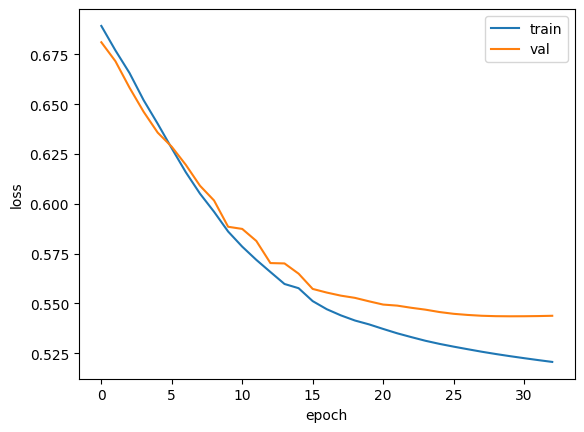

In [50]:
# 에포크 33 : accuracy: 74.77%
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()